In [9]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

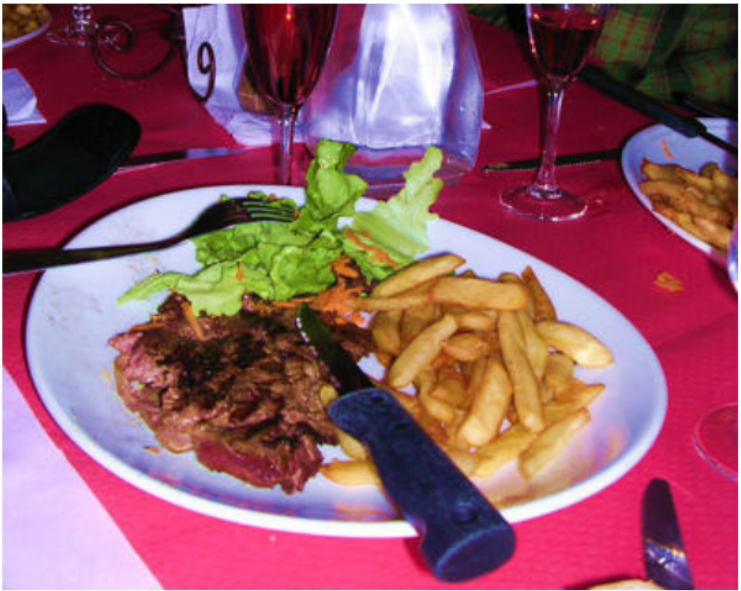

In [10]:
#Leer las imágenes
imgRGB = Image.open("pescadito.png")
imgRGB

In [11]:
#Función que multiplica matrices
def multiplicar_matrices(matrix1, matrix2):
    # Convertir la lista en una matriz columna
    if type(matrix2) == list:
        matrix2 = np.array(matrix2).reshape((-1, 1))
    
    # Verificar si las matrices se pueden multiplicar
    if matrix1.shape[1] != matrix2.shape[0]:
        print("No se pueden multiplicar las matrices.")
        return None
    
    # Inicializar la matriz de resultado con ceros
    if len(matrix2.shape) == 1:
        result = np.zeros((matrix1.shape[0], 1))
    else:
        result = np.zeros((matrix1.shape[0], matrix2.shape[1]))

    # Realizar la multiplicación de matrices
    if len(matrix2.shape) == 1:
        
       for i in range(matrix1.shape[0]):
            for j in range(matrix2.shape[0]):
                result[i] += matrix1[i][j] * matrix2[j]
    else:
        # Si la segunda matriz no es una matriz columna, realizar la multiplicación normalmente
        for i in range(matrix1.shape[0]):
            for j in range(matrix2.shape[1]):
                for k in range(matrix2.shape[0]):
                    result[i][j] += matrix1[i][k] * matrix2[k][j]

    return result

#Función que hace la conversipon de RGB a XYZ

def rgb2xyz(imgOriginal):
    #Se crea la matriz de conversión
    matrix = np.array([[0.41, 0.36, 0.18], [0.21, 0.72, 0.07], [0.02, 0.12, 0.95]])

    copia = np.zeros((imgOriginal.shape[0], imgOriginal.shape[1], 3), dtype = int)
    
    
    #Se aplica la conversión
    for i in range(imgOriginal.shape[0]):
        for j in range(imgOriginal.shape[1]):
            vector = np.array(([imgOriginal[i][j][0]], [imgOriginal[i][j][1]], [imgOriginal[i][j][2]]))
            
            res = multiplicar_matrices(matrix, vector).astype(int)
                        
            copia[i][j][0] = res[0]
            copia[i][j][1] = res[1]
            copia[i][j][2] = res[2]
             
    return copia

def rgb2cmy(imgOriginal):
    copia = np.zeros((imgOriginal.shape[0], imgOriginal.shape[1], 3), dtype = int)
    
    for i in range(imgOriginal.shape[0]):
        for j in range(imgOriginal.shape[1]):
            copia[i][j][0] = 255 - imgOriginal[i][j][0]
            copia[i][j][1] = 255 - imgOriginal[i][j][1]
            copia[i][j][2] = 255 - imgOriginal[i][j][2]
            
    return copia

def modeloHVS (imagen):
    mdlHLS = np.zeros(imagen.shape, dtype = int)
    for i in range (imagen.shape[0]):
        for j in range(imagen.shape[1]):
            r = imagen[i][j][0]
            g = imagen[i][j][1]
            b = imagen[i][j][2]
            maximo = max(r,g,b)
            minimo = min(r,g,b)
            delta = maximo- minimo

            if delta == 0 :
                mdlHLS[i][j][0] = 0
            elif r == maximo :
                mdlHLS[i][j][0] = int(((g - b) * 60) / delta)
            elif g == maximo:
                mdlHLS[i][j][0] = int((((b - r) * 60) / delta) + 120)
            elif b == maximo :
                mdlHLS[i][j][0] = int((((r - g) * 60) / delta) + 240)
    
            if maximo == 0:
                mdlHLS[i][j][1] = 0
            else:
                mdlHLS[i][j][1] = int((delta / maximo)*255)

            mdlHLS[i][j][2] = maximo
    
    return mdlHLS  

def modeloHSL (imagen):
    mdlHLS = np.zeros(imagen.shape, dtype = int)
    for i in range (imagen.shape[0]):
        for j in range(imagen.shape[1]):
            r = imagen[i][j][0]
            g = imagen[i][j][1]
            b = imagen[i][j][2]
            maximo = max(r,g,b)
            minimo = min(r,g,b)
            delta = maximo- minimo

            if delta == 0 :
                mdlHLS[i][j][0] = 0
            elif r == maximo :
                mdlHLS[i][j][0] = int(((g - b) * 60) / delta)
            elif g == maximo:
                mdlHLS[i][j][0] = int((((b - r) * 60) / delta) + 120)
            elif b == maximo :
                mdlHLS[i][j][0] = int((((r - g) * 60) / delta) + 240)

            mdlHLS[i][j][1] = delta
            mdlHLS[i][j][2] = int((maximo + minimo) // 2)
    
    return mdlHLS    

            
def graficar3canales(img):
    #Obtener los canales
    canal1 = img[:,:,0]
    canal2 = img[:,:,1]
    canal3 = img[:,:,2]
    
    #Graficar los canales
    fig = plt.figure(figsize=(20, 20))
    fig.add_subplot(1, 3, 1)
    plt.imshow(Image.fromarray(canal1.astype(int)))
    fig.add_subplot(1, 3, 2)
    plt.imshow(Image.fromarray(canal2.astype(int)))
    fig.add_subplot(1, 3, 3)
    plt.imshow(Image.fromarray(canal3.astype(int)))
    plt.show()
    
    return



C:\Users\nanga\AppData\Local\Temp\ipykernel_16028\471289232.py:80: RuntimeWarning: overflow encountered in scalar subtract
  mdlHLS[i][j][0] = int(((g - b) * 60) / delta)
C:\Users\nanga\AppData\Local\Temp\ipykernel_16028\471289232.py:84: RuntimeWarning: overflow encountered in scalar subtract
  mdlHLS[i][j][0] = int((((r - g) * 60) / delta) + 240)
C:\Users\nanga\AppData\Local\Temp\ipykernel_16028\471289232.py:82: RuntimeWarning: overflow encountered in scalar subtract
  mdlHLS[i][j][0] = int((((b - r) * 60) / delta) + 120)
C:\Users\nanga\AppData\Local\Temp\ipykernel_16028\471289232.py:116: RuntimeWarning: overflow encountered in scalar add
  mdlHLS[i][j][2] = int((maximo + minimo) // 2)
C:\Users\nanga\AppData\Local\Temp\ipykernel_16028\471289232.py:109: RuntimeWarning: overflow encountered in scalar subtract
  mdlHLS[i][j][0] = int(((g - b) * 60) / delta)
C:\Users\nanga\AppData\Local\Temp\ipykernel_16028\471289232.py:113: RuntimeWarning: overflow encountered in scalar subtract
  mdlHLS

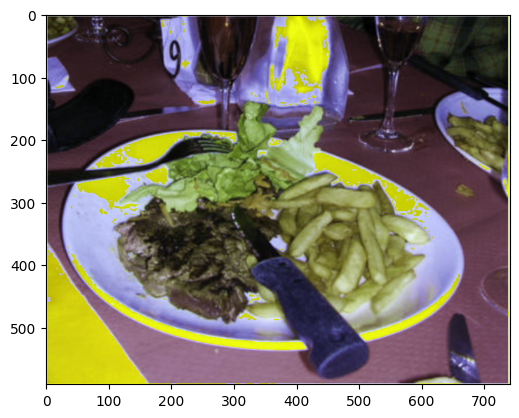

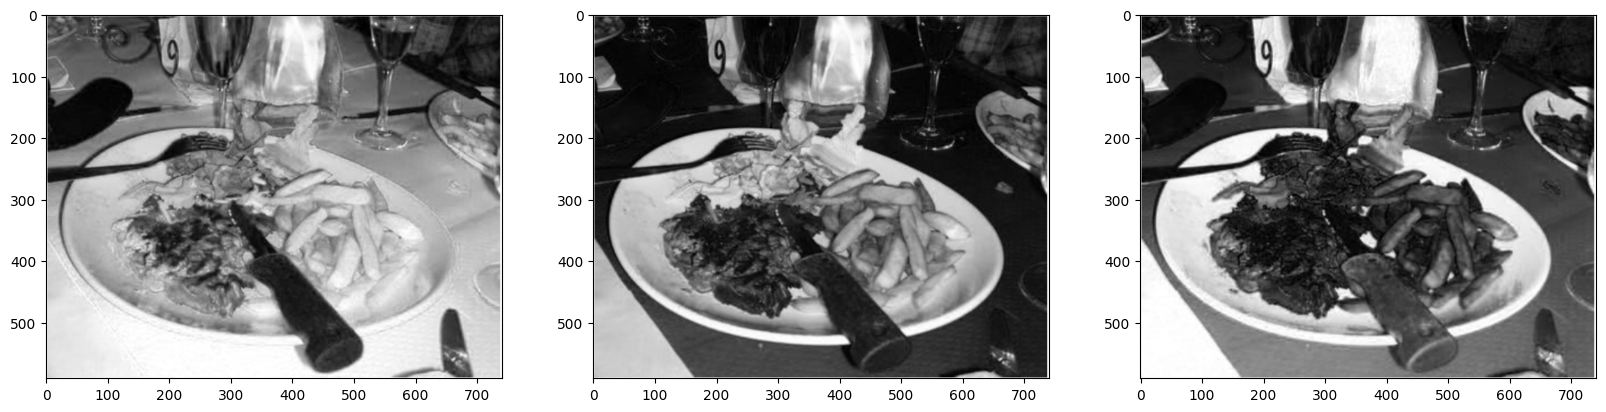

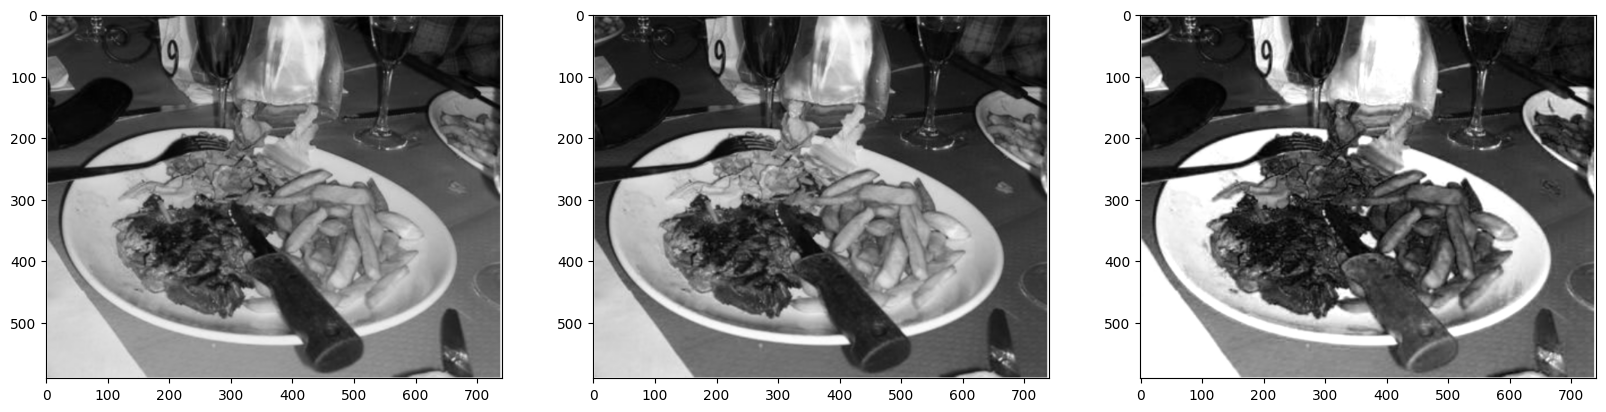

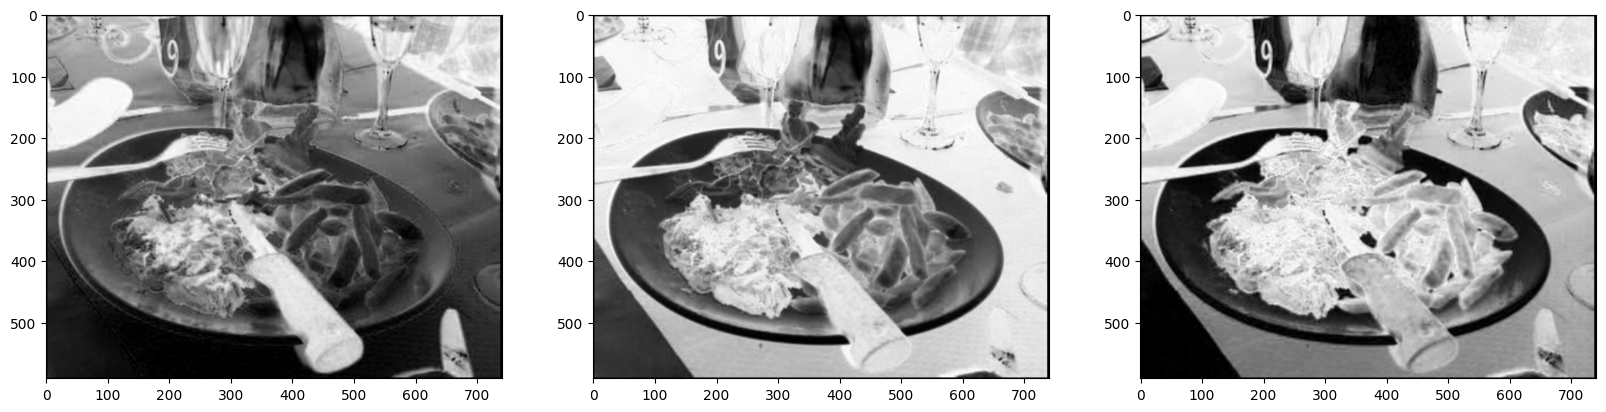

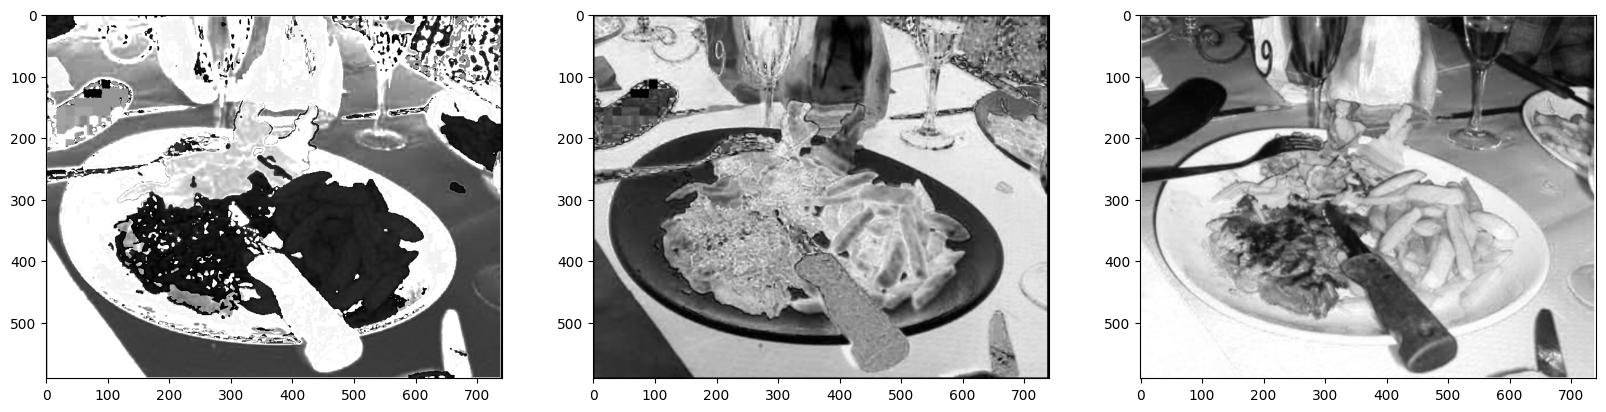

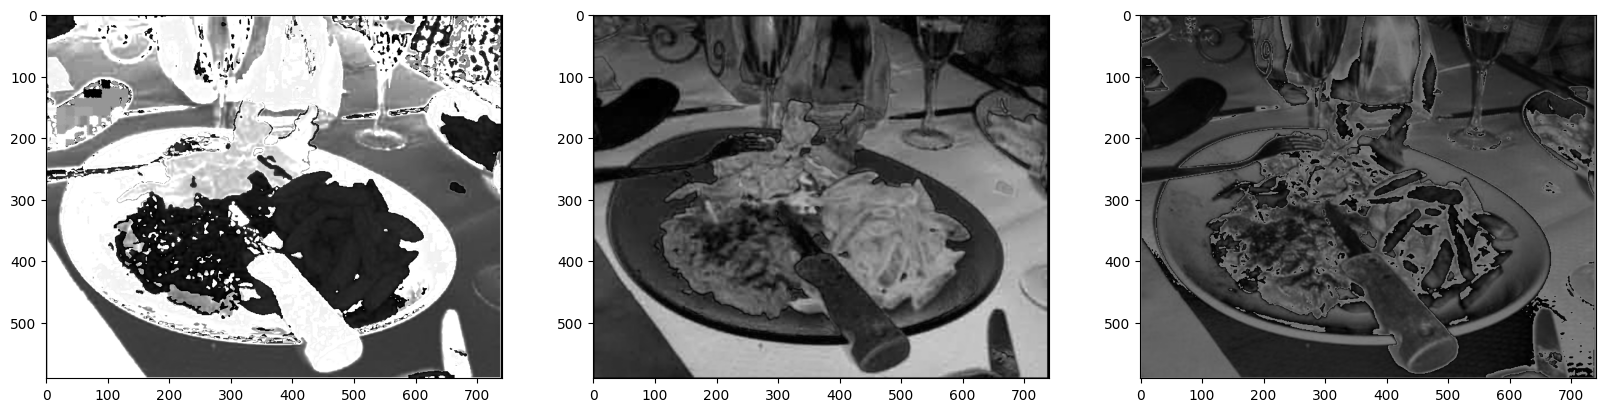

In [12]:
imgRGB = np.array(imgRGB)
imgXYZ = rgb2xyz(np.array(imgRGB)) 
imgCMY = rgb2cmy(np.array(imgRGB))
imgHVS = modeloHVS(np.array(imgRGB))
imgHLS = modeloHSL(np.array(imgRGB))

#Imprimir la imagen XYZ
plt.imshow(Image.fromarray(imgXYZ.astype(np.uint8)))
plt.show()


#Se grafican los canales de la imagen RGB
graficar3canales(imgRGB)

#Se grafican los canales de la imagen XYZ
graficar3canales(imgXYZ)

#Se grafican los canales de la imagen CMY
graficar3canales(imgCMY)

#Se grafican los canales de la imagen HVS
graficar3canales(imgHVS)

#se grafica los vloores de la imagen de HLS
graficar3canales(imgHLS)


